In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

fish_data = pd.read_csv(r"C:\Users\SHREE\Downloads\Python CODES\Fish Weight Prediction using Machine Learning\fish.csv")
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [2]:
fish_data.shape

(159, 7)

In [3]:
fish_data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [4]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
fish_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [6]:
fish_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
fish_data.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

In [8]:
fish_data['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

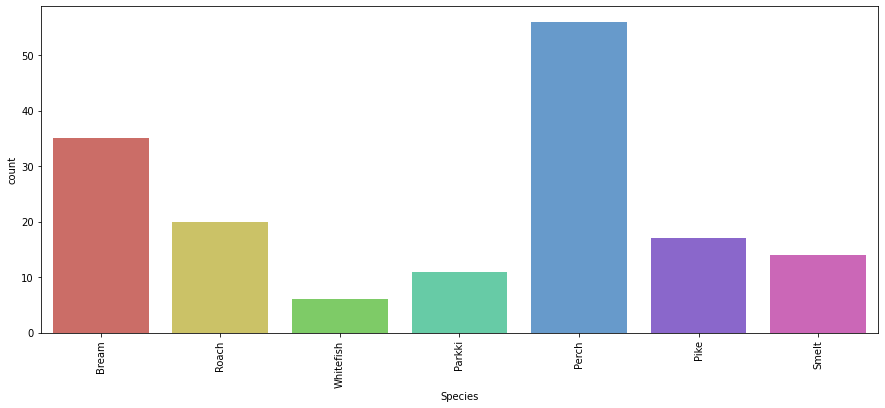

In [9]:
plt.figure(figsize=(15,6))
sns.countplot('Species', data = fish_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

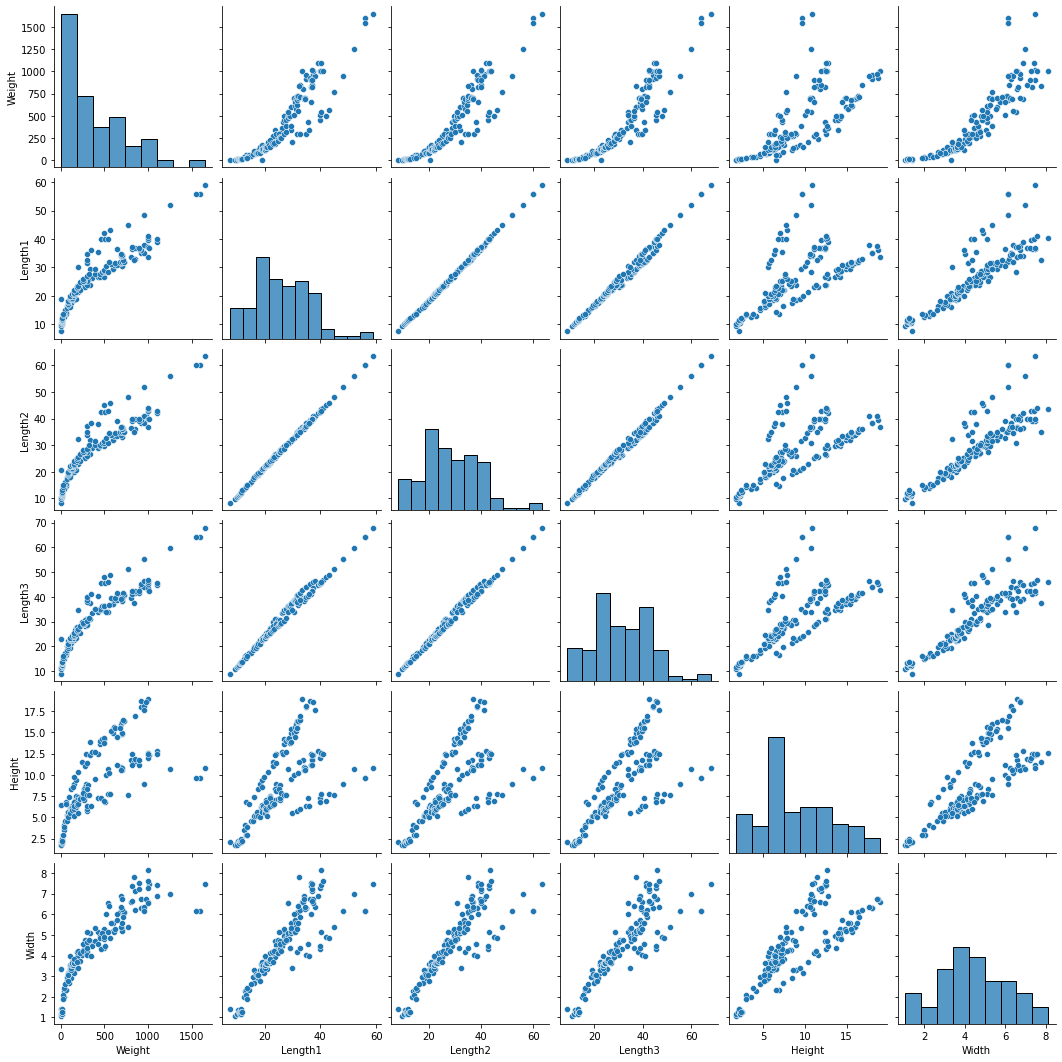

In [10]:
sns.pairplot(fish_data)

In [11]:
fish_data.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


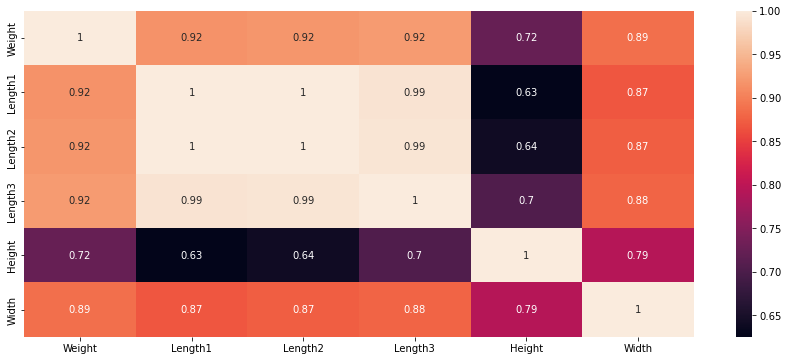

In [12]:
plt.figure(figsize=(15,6))
sns.heatmap(fish_data.corr(), annot = True)
plt.show()

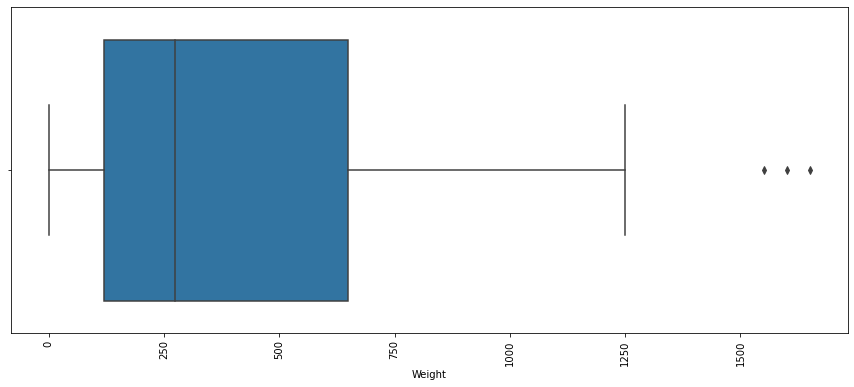

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(fish_data['Weight'])
plt.xticks(rotation = 90)
plt.show()

In [14]:
fish_weight = fish_data['Weight']
Q3 = fish_weight.quantile(0.75)
Q1 = fish_weight.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)

In [15]:
weight_outliers = fish_weight[(fish_weight <lower_limit) | (fish_weight >upper_limit)]
weight_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

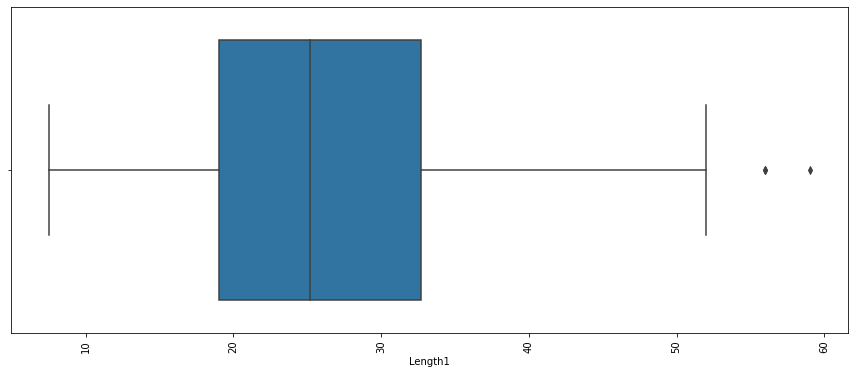

In [16]:
plt.figure(figsize=(15,6))
sns.boxplot(fish_data['Length1'])
plt.xticks(rotation = 90)
plt.show()

In [17]:
fish_Length1 = fish_data['Length1']
Q3 = fish_Length1.quantile(0.75)
Q1 = fish_Length1.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)

In [18]:
length1_outliers = fish_Length1[(fish_Length1 <lower_limit) | (fish_Length1 >upper_limit)]
length1_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

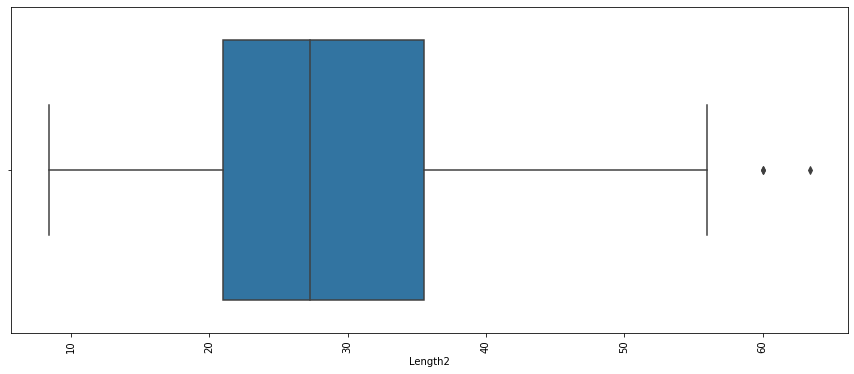

In [19]:
plt.figure(figsize=(15,6))
sns.boxplot(fish_data['Length2'])
plt.xticks(rotation = 90)
plt.show()

In [20]:
fish_Length2 = fish_data['Length2']
Q3 = fish_Length2.quantile(0.75)
Q1 = fish_Length2.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)

length2_outliers = fish_Length2[(fish_Length2 <lower_limit) | (fish_Length2 >upper_limit)]
length2_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

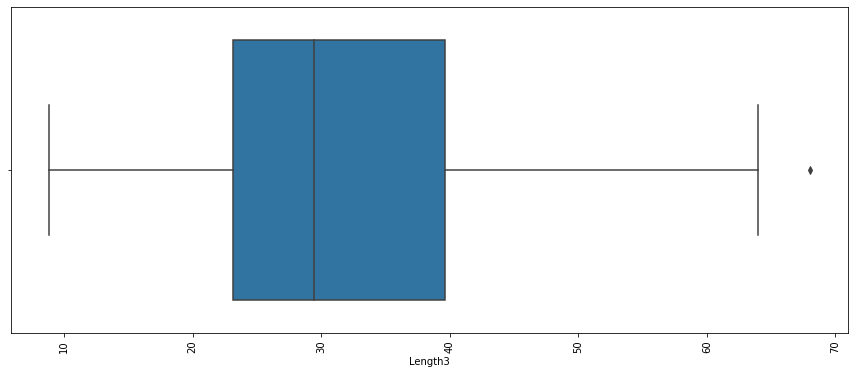

In [21]:
plt.figure(figsize=(15,6))
sns.boxplot(fish_data['Length3'])
plt.xticks(rotation = 90)
plt.show()

In [22]:
fish_Length3 = fish_data['Length3']
Q3 = fish_Length3.quantile(0.75)
Q1 = fish_Length3.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)

length3_outliers = fish_Length3[(fish_Length3 <lower_limit) | (fish_Length3 >upper_limit)]
length3_outliers

144    68.0
Name: Length3, dtype: float64

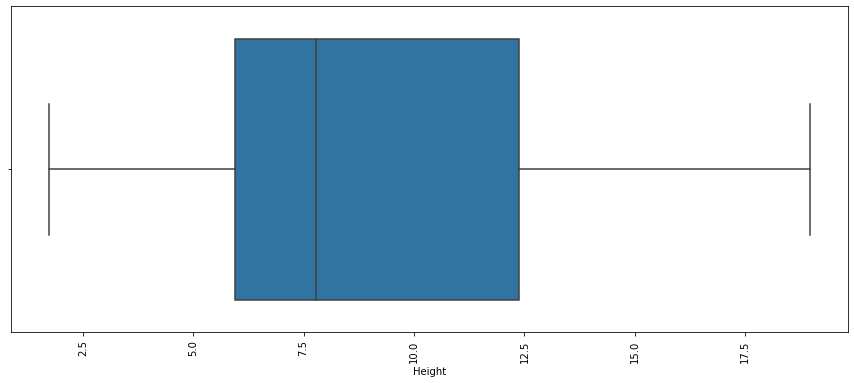

In [23]:
plt.figure(figsize=(15,6))
sns.boxplot(fish_data['Height'])
plt.xticks(rotation = 90)
plt.show()

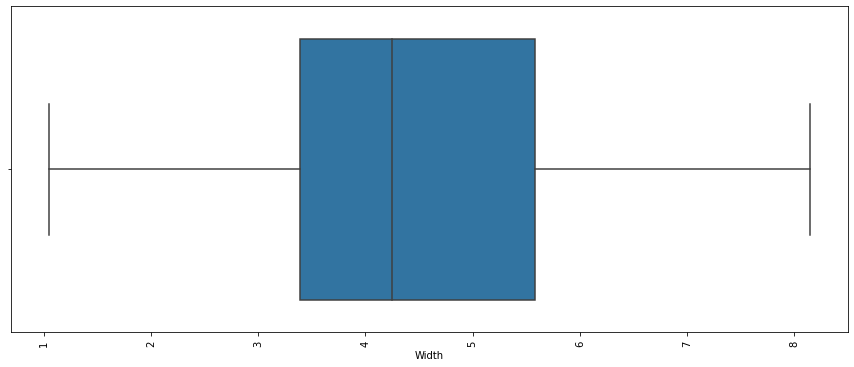

In [24]:
plt.figure(figsize=(15,6))
sns.boxplot(fish_data['Width'])
plt.xticks(rotation = 90)
plt.show()

In [25]:
fish_data[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [26]:
fish_data_new = fish_data.drop([142,143,144])

In [27]:
fish_data_new.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [29]:
scaling_columns = ['Weight', 'Length1','Length2','Length3','Height','Width']

fish_data_new[scaling_columns] = scaler.fit_transform(fish_data_new[scaling_columns])
fish_data_new.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,-1.665335e-16,5.551115e-17,-5.394545e-16,-2.135044e-16,1.935773e-16,1.138690e-16
std,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-1.177998e+00,-1.997257e+00,-1.986079e+00,-2.042126e+00,-1.675635e+00,-1.996688e+00
25%,-8.012570e-01,-7.321794e-01,-6.952556e-01,-7.078263e-01,-7.004973e-01,-6.036162e-01
50%,-3.271912e-01,-7.213903e-02,-1.061895e-01,-1.239237e-01,-3.023653e-01,-7.944425e-02
75%,7.449512e-01,7.116589e-01,7.389923e-01,8.304874e-01,7.951438e-01,6.291357e-01
max,2.746388e+00,2.898043e+00,2.890364e+00,2.732275e+00,2.321310e+00,2.259561e+00


In [30]:
data_cleaned = fish_data_new.drop("Weight", axis=1)
y = fish_data_new['Weight']

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_cleaned,y,
                                                    test_size=0.2,
                                                    random_state=42)

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [33]:
x_train['Species'] = label_encoder.fit_transform(x_train['Species'].values)
x_test['Species'] = label_encoder.transform(x_test['Species'].values)

In [34]:
#pip install hyperopt

In [35]:
from itertools import combinations
from hyperopt import hp
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
def evauation_model(pred, y_val):
    score_MSE = round(mean_squared_error(pred, y_val),2)
    score_MAE = round(mean_absolute_error(pred, y_val),2)
    score_r2score = round(r2_score(pred, y_val),2)
    return score_MSE, score_MAE, score_r2score

In [37]:
def models_score(model_name, train_data, y_train, val_data, y_val):
    model_list = ["Decision_Tree", "Random_Forest", "XGboost_Regressor"]
# model_1
    if model_name == "Decision_Tree":
        reg = DecisionTreeRegressor(random_state=42)
# model_2
    elif model_name == "Random_Forest":
        reg = RandomForestRegressor(random_state=42)
# model_3
    elif model_name == "XGboost_Regressor":
        reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, )
    else:
        print("please enter correct regressor name")
    
    if model_name in model_list:
        reg.fit(train_data, y_train)
        pred = reg.predict(val_data)
        score_MSE, score_MAE, score_r2score = evauation_model(pred, y_val)
        return round(score_MSE, 2), round(score_MAE, 2), round(score_r2score, 2)

In [38]:
model_list = ["Decision_Tree","Random_Forest","XGboost_Regressor"]
result_scores = []
for model in model_list:
    score = models_score(model, x_train, y_train, x_test, y_test)
    result_scores.append((model, score[0], score[1],score[2]))
    print(model,score)

Decision_Tree (0.05, 0.16, 0.94)
Random_Forest (0.03, 0.11, 0.97)
XGboost_Regressor (0.04, 0.14, 0.96)


In [39]:
df_result_scores = pd.DataFrame(result_scores,columns=["model","mse","mae","r2score"])
df_result_scores

,model,mse,mae,r2score
0,Decision_Tree,0.05,0.16,0.94
1,Random_Forest,0.03,0.11,0.97
2,XGboost_Regressor,0.04,0.14,0.96
